In [1]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-eng

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=0f98050b62f74b778e9aa124e2fa0600a79345a09a19b32fca5198a5ce87a1c1
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 11 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://arc

In [2]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [3]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [5]:
img = cv2.imread("aad1.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

In [6]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', text.shape[0]+1)

In [7]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")
  
print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

text1 : 

    level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0    897   
1       2         1          1        0         0         0   412   34    195   
2       3         1          1        1         0         0   412   34    195   
3       4         1          1        1         1         0   412   34    195   
4       5         1          1        1         1         1   412   34     74   
..    ...       ...        ...      ...       ...       ...   ...  ...    ...   
40      4         1          6        1         1         0   234  468    409   
41      5         1          6        1         1         1   234  472     57   
42      5         1          6        1         1         2   314  474    113   
43      5         1          6        1         1         3   447  468     62   
44      5         1          6        1         1         4   525  477    118   

    height  conf 

In [9]:
from pytesseract import Output

img = cv2.imread('aad1.jpeg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


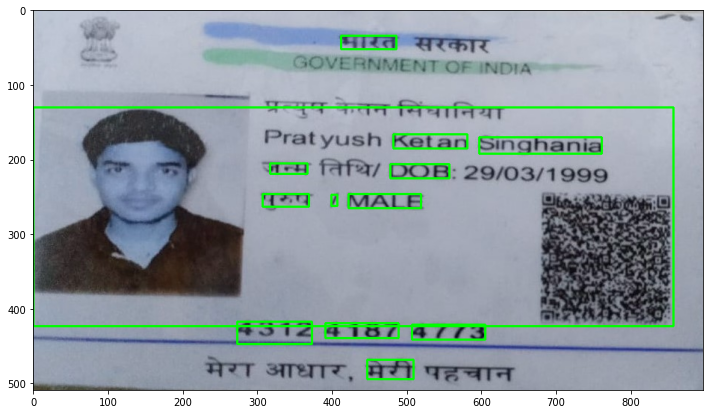

In [10]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)